In [1]:
import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_65372043ea7549fb96148a2539c14b06 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='-BraEQZoPpdV3eJyF3KZICDmGLFAVO2r0tHoeBaTAi89',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_65372043ea7549fb96148a2539c14b06.get_object(Bucket='predictinglifeexpectancy-donotdelete-pr-fd5lqyblx39bjw',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

life_data = pd.read_csv(body)
life_data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
status = pd.get_dummies(life_data.Status)
life_data = pd.concat([life_data, status], axis = 1)
life_data = life_data.drop(['Status'], axis=1)
life_data.rename(columns = {'Developing' : '0', 'Developed' : 1})
life_data

,Country,Year,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Developed,Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
5,Afghanistan,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0,1
6,Afghanistan,2009,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,...,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,0,1
7,Afghanistan,2008,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,...,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,0,1
8,Afghanistan,2007,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,...,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,0,1
9,Afghanistan,2006,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,...,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,0,1


In [3]:
life_data = life_data.drop('Country',axis=1)
life_data.head()

,Year,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,...,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Developed,Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [4]:
life_data.dtypes

Year                                 int64
Life expectancy                    float64
Adult Mortality                    float64
Infant Deaths                        int64
Alcohol                            float64
Percentage Expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
Under-Five Deaths                    int64
Polio                              float64
Total Expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 Thinness  10-19 years             float64
 Thinness 5-9 years                float64
Income Composition of Resources    float64
Schooling                          float64
Developed                            uint8
Developing                           uint8
dtype: object

In [5]:
convert_dict = {'Developed': np.int64, 'Developing': np.int64}
life_data = life_data.astype(convert_dict)
life_data.dtypes

Year                                 int64
Life expectancy                    float64
Adult Mortality                    float64
Infant Deaths                        int64
Alcohol                            float64
Percentage Expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
Under-Five Deaths                    int64
Polio                              float64
Total Expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 Thinness  10-19 years             float64
 Thinness 5-9 years                float64
Income Composition of Resources    float64
Schooling                          float64
Developed                            int64
Developing                           int64
dtype: object

In [6]:
life_data.isnull()

,Year,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,...,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Developed,Developing
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
life_data.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
Infant Deaths                        0
Alcohol                            194
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
Under-Five Deaths                    0
Polio                               19
Total Expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 Thinness  10-19 years              34
 Thinness 5-9 years                 34
Income Composition of Resources    167
Schooling                          163
Developed                            0
Developing                           0
dtype: int64

In [8]:
Y = life_data['Life expectancy ']
X = life_data.drop('Life expectancy ', axis = 1)
X.fillna(value = X.mean(), inplace = True)
Y.fillna(value = Y.mean(), inplace = True)

In [9]:
X.isnull().sum()

Year                               0
Adult Mortality                    0
Infant Deaths                      0
Alcohol                            0
Percentage Expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
Under-Five Deaths                  0
Polio                              0
Total Expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 Thinness  10-19 years             0
 Thinness 5-9 years                0
Income Composition of Resources    0
Schooling                          0
Developed                          0
Developing                         0
dtype: int64

In [10]:
Y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
5       58.8
6       58.6
7       58.1
8       57.5
9       57.3
10      57.3
11      57.0
12      56.7
13      56.2
14      55.3
15      54.8
16      77.8
17      77.5
18      77.2
19      76.9
20      76.6
21      76.2
22      76.1
23      75.3
24      75.9
25      74.2
26      73.5
27      73.0
28      72.8
29      73.3
        ... 
2908    63.0
2909    59.2
2910    58.2
2911    58.0
2912    57.4
2913    55.7
2914    52.6
2915    58.0
2916    49.3
2917    47.9
2918    46.4
2919    45.5
2920    44.6
2921    43.8
2922    67.0
2923    59.2
2924    58.0
2925    56.6
2926    54.9
2927    52.4
2928    50.0
2929    48.2
2930    46.6
2931    45.4
2932    44.6
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[1.        , 0.36288089, 0.03444444, ..., 0.48792271, 0.        ,
        1.        ],
       [0.93333333, 0.37396122, 0.03555556, ..., 0.48309179, 0.        ,
        1.        ],
       [0.86666667, 0.36980609, 0.03666667, ..., 0.47826087, 0.        ,
        1.        ],
       ...,
       [0.13333333, 0.09972299, 0.01388889, ..., 0.48309179, 0.        ,
        1.        ],
       [0.06666667, 0.94875346, 0.01388889, ..., 0.47342995, 0.        ,
        1.        ],
       [0.        , 0.91966759, 0.01333333, ..., 0.47342995, 0.        ,
        1.        ]])

In [12]:
np.isnan(X).sum()

0

In [13]:
np.isinf(X).sum()

0

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,random_state = None)

In [15]:
x_train

array([[3.33333333e-01, 9.14127424e-02, 0.00000000e+00, ...,
        7.14975845e-01, 1.00000000e+00, 0.00000000e+00],
       [6.66666667e-02, 2.49307479e-02, 0.00000000e+00, ...,
        6.47342995e-01, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.27146814e-01, 0.00000000e+00, ...,
        7.97101449e-01, 1.00000000e+00, 0.00000000e+00],
       ...,
       [4.66666667e-01, 2.64542936e-01, 7.22222222e-03, ...,
        4.87922705e-01, 0.00000000e+00, 1.00000000e+00],
       [9.33333333e-01, 1.82825485e-01, 5.55555556e-04, ...,
        6.18357488e-01, 0.00000000e+00, 1.00000000e+00],
       [9.33333333e-01, 1.73130194e-01, 2.22222222e-03, ...,
        6.28019324e-01, 0.00000000e+00, 1.00000000e+00]])

In [16]:
x_test

array([[4.66666667e-01, 9.14127424e-02, 1.61111111e-02, ...,
        4.63768116e-01, 0.00000000e+00, 1.00000000e+00],
       [4.00000000e-01, 4.29362881e-02, 6.11111111e-03, ...,
        4.83091787e-01, 0.00000000e+00, 1.00000000e+00],
       [9.33333333e-01, 7.75623269e-02, 1.11111111e-03, ...,
        7.39130435e-01, 1.00000000e+00, 0.00000000e+00],
       ...,
       [8.66666667e-01, 1.62049861e-01, 5.55555556e-04, ...,
        6.23188406e-01, 0.00000000e+00, 1.00000000e+00],
       [5.33333333e-01, 1.03878116e-01, 0.00000000e+00, ...,
        6.95652174e-01, 0.00000000e+00, 1.00000000e+00],
       [6.66666667e-01, 1.02493075e-01, 0.00000000e+00, ...,
        7.43961353e-01, 1.00000000e+00, 0.00000000e+00]])

In [17]:
y_train

1644    79.0
382     74.7
1522    73.6
1736    75.4
63      45.3
2903    61.5
1681    71.5
2502    46.4
1748    74.3
1711    67.5
902     69.2
307     69.8
1162    73.5
1617    69.6
2582    71.4
759     69.0
1507    72.4
359     73.4
2188    72.7
1156    75.5
2402    54.0
2009    75.3
1100    53.9
1396    74.5
311     67.4
2674    74.4
281     56.8
1397    74.3
2095    79.8
565     75.0
        ... 
2570    74.6
1273    81.0
1825    64.3
303     62.0
236     67.7
2199    79.0
1992    73.9
1106    66.2
848     53.1
1547    79.4
1513    72.6
2490    58.4
2145    65.0
2060    79.6
2374    66.5
1373    53.0
1130    61.8
1466    74.4
2452    69.1
54      49.1
2781    58.6
722     59.3
1590    74.3
900     69.6
355     74.5
1415    68.8
454     72.4
1066    75.0
1299    75.8
1587    74.8
Name: Life expectancy , Length: 2350, dtype: float64

In [18]:
y_test

2930    46.600000
1499    56.700000
1315    83.500000
969     58.700000
874     73.000000
291     68.700000
930     82.400000
897     51.200000
81      76.200000
1115    65.200000
1988    59.300000
384     74.500000
2459    63.500000
2183    71.600000
1812    69.224932
602     60.000000
193     71.400000
2901    62.200000
39      74.100000
217     74.100000
525     45.600000
2821    75.400000
2693    71.600000
2702    65.800000
2814    77.000000
2311    41.000000
632     78.900000
1061    71.300000
2891    65.400000
2349    79.800000
          ...    
484     55.600000
1695    75.000000
1546    79.700000
617     56.900000
1303    75.000000
593     63.200000
728     56.300000
645     77.000000
2410    56.600000
2057    86.000000
849     52.700000
1893    54.500000
2143    67.300000
33      75.400000
1240    74.000000
2128    72.500000
408     55.300000
2326    79.000000
1490    61.400000
220     73.700000
1189    67.300000
657     79.100000
2503    47.100000
2066    78.000000
2228    63

RANDOM FOREST REGRESSION

In [19]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
random_forest_fit = random_forest_model.fit(x_train, y_train)

In [20]:
random_forest_model_predict = random_forest_model.predict(x_test)
random_forest_model_predict = np.array(random_forest_model_predict)
y_test = np.array(y_test)
print(np.concatenate((random_forest_model_predict.reshape(len(y_test),1),y_test.reshape(len(y_test),1)),1)) 

[[49.36  46.6  ]
 [55.623 56.7  ]
 [83.318 83.5  ]
 ...
 [77.126 77.5  ]
 [75.911 75.8  ]
 [82.455 84.   ]]


In [21]:
accuracy = random_forest_model.score(x_test,y_test)
print(accuracy)

0.9636858611684692


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean squared error: %.2f" % mean_squared_error(y_test, random_forest_model_predict))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, random_forest_model_predict))

Mean squared error: 3.58
Mean absolute error: 1.20


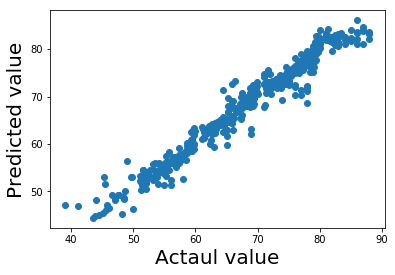

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y_test,random_forest_model_predict)
plt.xlabel("Actaul value", fontsize = 20)
plt.ylabel("Predicted value", fontsize = 20)
plt.show()

In [25]:
!pip install watson-machine-learning-client

In [26]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-16 15:36:36,542 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [27]:
wml_credentials={
  "apikey": "ZCDpfTnNrq9oaptiFRbFETGJMcG-pDZIE5VcJPFrjDCU",
  "instance_id": "cb431f96-43b2-4830-bcba-f0715e2e9a86",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}


In [28]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [29]:
model_props = {
    client.repository.ModelMetaNames.AUTHOR_NAME: "Vidya",
    client.repository.ModelMetaNames.AUTHOR_EMAIL: "vidyasreekumar.mec@gmail.com",
    client.repository.ModelMetaNames.NAME: "Life Expectancy"
}

In [30]:
model_artifact = client.repository.store_model(random_forest_model, meta_props = model_props)

In [31]:
published_model_uid = client.repository.get_model_uid(model_artifact)
published_model_uid

'd8d2c6d4-ea94-49ef-8ac1-a1b01d2e50cb'

In [32]:
client.deployments.list()

------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME             TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
9410c75d-6e8d-4285-9d40-4296a4f3589d  Life Expectancy  online  DEPLOY_SUCCESS  2020-06-16T07:41:20.192Z  scikit-learn-0.20  model
48b053c6-6304-4ad8-a257-136afdd003ff  Life Expectancy  online  DEPLOY_SUCCESS  2020-06-14T14:26:57.952Z  scikit-learn-0.20  model
19c16743-c2f9-47bd-9c11-d933fca7a2ae  Life expectancy  online  DEPLOY_SUCCESS  2020-06-13T16:49:13.331Z  scikit-learn-0.20  model
052c5fae-bba4-47e5-a101-80ec50d01469  Life expectancy  online  DEPLOY_SUCCESS  2020-06-13T14:53:53.438Z  scikit-learn-0.20  model
------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------


In [33]:
deployment = client.deployments.create(published_model_uid, name = "Life Expectancy")



#######################################################################################

Synchronous deployment creation for uid: 'd8d2c6d4-ea94-49ef-8ac1-a1b01d2e50cb' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='afc6174c-ec9d-4b60-a5a9-bc982e22ed07'
------------------------------------------------------------------------------------------------




In [34]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/cb431f96-43b2-4830-bcba-f0715e2e9a86/deployments/afc6174c-ec9d-4b60-a5a9-bc982e22ed07/online'